In [7]:
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Cargar el dataset CSV
df = pd.read_csv('tweets_globales_clasificados.csv')

# Inicializar el analizador VADER
analyzer = SentimentIntensityAnalyzer()

# Función para limpiar el texto y quitar símbolos
def limpiar_texto(texto):
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar signos de puntuación
    return texto


# Función para calcular la puntuación de un tweet usando VADER y palabras clave
def calcular_puntuacion_con_ponderacion(texto):
    texto = limpiar_texto(texto)
    sentiment_scores = analyzer.polarity_scores(texto)
    compound_score = sentiment_scores['compound']
    
    # Ponderación extra para palabras clave
    ponderacion_extra = 0
    palabras_clave = {
    'lluvia': -1, 'nublado': -1, 'tormenta': -2, 'viento': -1, 'granizo': -2,  # Clima
    'accidente': -2, 'choque': -2, 'derrape': -2, 'atropello': -3,  # Accidentes vehiculares
    'tráfico': -1, 'atasco': -1, 'congestión': -1, 'embotellamiento': -2,  # Problemas de tráfico
    'inundación': -3, 'desborde': -3, 'charco': -1, 'encharcamiento': -2,  # Problemas por agua
    'apagón': -2, 'falla': -1, 'electricidad': -1, 'corte': -2, 'colapso': -3,  # Problemas eléctricos
    'evacuación': -3, 'rescate': -2, 'desalojo': -3,  # Emergencias
    'muertos': -4, 'heridos': -3, 'destrucción': -4, 'incendio': -3,  # Consecuencias graves
    'explosión': -4, 'caos': -2, 'derrumbes': -3, 'colapsos': -3,  # Otros desastres
    'afectados': -2, 'perdidas': -3, 'daños': -2, 'colisión': -2,  # Impactos generales
    'caída': -1, 'árboles': -1, 'postes': -1, 'barrido': -2,  # Daños materiales
}

    
    for palabra, peso in palabras_clave.items():
        if palabra in texto:
            ponderacion_extra += peso
    
    return compound_score + ponderacion_extra

# Aplicar la función al dataframe
df['puntuacion'] = df['Texto'].apply(calcular_puntuacion_con_ponderacion)
df.to_csv('tweets_puntuados_nlp_ponderado.csv', index=False)

print("Análisis de sentimiento completado y guardado en 'tweets_puntuados_nlp.csv'")


Análisis de sentimiento completado y guardado en 'tweets_puntuados_nlp.csv'


In [18]:
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Cargar el dataset CSV
df = pd.read_csv('tweets_globales_clasificados.csv')

# Inicializar el analizador VADER
analyzer = SentimentIntensityAnalyzer()

# Función para limpiar el texto y quitar símbolos
def limpiar_texto(texto):
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar signos de puntuación
    return texto

# Diccionario de palabras clave con puntuaciones negativas
palabras_clave = {
    'lluvia': -1, 'nublado': -1, 'tormenta': -2, 'viento': -1, 'granizo': -2,  # Clima
    'accidente': -2, 'choque': -2, 'derrape': -2, 'atropello': -3,  # Accidentes vehiculares
    'tráfico': -1, 'atasco': -1, 'congestión': -1, 'embotellamiento': -2,  # Problemas de tráfico
    'inundación': -3, 'desborde': -3, 'charco': -1, 'encharcamiento': -2,  # Problemas por agua
    'apagón': -2, 'falla': -1, 'electricidad': -1, 'corte': -2, 'colapso': -3,  # Problemas eléctricos
    'evacuación': -3, 'rescate': -2, 'desalojo': -3,  # Emergencias
    'muertos': -4, 'heridos': -3, 'destrucción': -4, 'incendio': -3,  # Consecuencias graves
    'explosión': -4, 'caos': -2, 'derrumbes': -3, 'colapsos': -3,  # Otros desastres
    'afectados': -2, 'perdidas': -3, 'daños': -2, 'colisión': -2,  # Impactos generales
    'caída': -1, 'árboles': -1, 'postes': -1, 'barrido': -2,  # Daños materiales
}

# Función para traducir el tweet y calcular la puntuación usando TextBlob
def calcular_puntuacion_textblob(texto):
    texto = limpiar_texto(texto)
    try:
        blob = TextBlob(texto)
        # Traducir al inglés antes de hacer el análisis de sentimiento
        texto_traducido = blob.translate(to='en')
        sentiment = texto_traducido.sentiment.polarity
    except Exception as e:
        sentiment = 0  # En caso de error en la traducción o análisis
    
    return sentiment

# Aplicar la función al dataframe
df['puntuacion'] = df['tweet'].apply(calcular_puntuacion_textblob)

df.to_csv('tweets_puntuados_textblob.csv', index=False)

print("Análisis de sentimiento completado con TextBlob.")


# Función para calcular la puntuación de un tweet usando VADER y palabras clave
def calcular_puntuacion_con_ponderacion(texto):
    texto_limpio = limpiar_texto(texto)
    sentiment_scores = analyzer.polarity_scores(texto_limpio)
    compound_score = sentiment_scores['compound']
    
    # Ponderación extra para palabras clave
    ponderacion_extra = 0

    for palabra, peso in palabras_clave.items():
        if palabra in texto_limpio:
            ponderacion_extra += peso

    # Sumar la ponderación extra al puntaje 'compound' de VADER
    puntuacion_total = compound_score + ponderacion_extra
    puntuacion_total = max(min(puntuacion_total, 1), -1)
    return puntuacion_total
    


# Crear una nueva columna 'puntuacion' en el dataframe usando la función actualizada
df['puntuacion'] = df['Texto'].apply(calcular_puntuacion_con_ponderacion)

# Guardar el dataframe actualizado en un nuevo archivo CSV
df.to_csv('tweets_puntuados_nlp_ponderado.csv', index=False)

print("Análisis de sentimiento completado y guardado en 'tweets_puntuados_nlp_ponderado.csv'")


Análisis de sentimiento completado con TextBlob.


In [19]:
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Cargar el dataset CSV
df = pd.read_csv('tweets_globales_clasificados.csv')

# Inicializar el analizador VADER
analyzer = SentimentIntensityAnalyzer()

# Función para limpiar el texto y quitar símbolos
def limpiar_texto(texto):
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar signos de puntuación
    return texto

# Función para traducir el texto al inglés
def traducir_al_ingles(texto):
    try:
        blob = TextBlob(texto)
        texto_traducido = str(blob.translate(to='en'))  # Traducir a inglés
        return texto_traducido
    except Exception as e:
        return texto  # Si hay un error en la traducción, usar el texto original

# Función para calcular la puntuación de un tweet usando VADER y palabras clave
def calcular_puntuacion_con_ponderacion(texto):
    texto = limpiar_texto(texto)
    
    # Traducir el texto al inglés antes de aplicar VADER
    texto_ingles = traducir_al_ingles(texto)
    
    # Análisis de sentimiento con VADER
    sentiment_scores = analyzer.polarity_scores(texto_ingles)
    compound_score = sentiment_scores['compound']
    
    # Ponderación extra para palabras clave en español
    ponderacion_extra = 0
    palabras_clave = {
        'lluvia': -1, 'nublado': -1, 'tormenta': -2, 'viento': -1, 'granizo': -2,  # Clima
        'accidente': -2, 'choque': -2, 'derrape': -2, 'atropello': -3,  # Accidentes vehiculares
        'tráfico': -1, 'atasco': -1, 'congestión': -1, 'embotellamiento': -2,  # Problemas de tráfico
        'inundación': -3, 'desborde': -3, 'charco': -1, 'encharcamiento': -2,  # Problemas por agua
        'apagón': -2, 'falla': -1, 'electricidad': -1, 'corte': -2, 'colapso': -3,  # Problemas eléctricos
        'evacuación': -3, 'rescate': -2, 'desalojo': -3,  # Emergencias
        'muertos': -4, 'heridos': -3, 'destrucción': -4, 'incendio': -3,  # Consecuencias graves
        'explosión': -4, 'caos': -2, 'derrumbes': -3, 'colapsos': -3,  # Otros desastres
        'afectados': -2, 'perdidas': -3, 'daños': -2, 'colisión': -2,  # Impactos generales
        'caída': -1, 'árboles': -1, 'postes': -1, 'barrido': -2,  # Daños materiales
    }
    
    # Añadir ponderación basada en palabras clave en español
    for palabra, peso in palabras_clave.items():
        if palabra in texto:
            ponderacion_extra += peso
    
    # Devolver la puntuación combinada
    return compound_score + ponderacion_extra

# Aplicar la función al dataframe
df['puntuacion'] = df['Texto'].apply(calcular_puntuacion_con_ponderacion)

# Guardar el dataframe actualizado en un archivo CSV
df.to_csv('tweets_puntuados_nlp_ponderado.csv', index=False)

print("Análisis de sentimiento completado y guardado en 'tweets_puntuados_nlp_ponderado.csv'")


Análisis de sentimiento completado y guardado en 'tweets_puntuados_nlp_ponderado.csv'


In [26]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Descargar los recursos necesarios de nltk
nltk.download('vader_lexicon')

# Cargar el archivo CSV
file_path = 'tweets_globales_clasificados.csv'  # Reemplaza con la ruta correcta
data = pd.read_csv(file_path)

# Inicializar el analizador de sentimientos VADER
sia = SentimentIntensityAnalyzer()

# Función para obtener la puntuación de sentimiento
def vader_sentiment_score(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']  # 'compound' da una puntuación general de sentimiento

# Aplicar la función a la columna 'Texto' y crear una nueva columna 'puntuación'
data['puntuación'] = data['Texto'].apply(vader_sentiment_score)

# Guardar el dataset modificado en un nuevo archivo CSV
output_path = 'Tweets_calificados.csv'  # Reemplaza con la ruta correcta
data.to_csv(output_path, index=False)




[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Daniel/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Utilizando Bert de sentimiento

In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import pandas as pd

/Users/Daniel/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Cambia el modelo a uno adecuado para español
MODEL = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


In [4]:
# Lee el archivo CSV
file_path = 'tweets_globales_clasificados.csv'
df = pd.read_csv(file_path)

# Asignación de valores a las etiquetas de sentimiento
sentiment_labels = [-2, -1, 0, 1, 2]

# Función para calcular la puntuación de sentimiento
def calculate_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)
    scores = outputs.logits.detach().numpy()
    scores = softmax(scores[0])
    sentiment_score = sum([a*b for a, b in zip(sentiment_labels, scores)])
    return sentiment_score

# Aplicar la función a cada texto en la columna 'Texto'
df['Puntaje'] = df['Texto'].apply(calculate_sentiment)

# Mostrar las primeras filas con las nuevas puntuaciones de sentimiento
print(df.head())

   Usuario Nombre                       Fecha  \
0  @Cicmty    CIC  Jun 21, 2024 · 9:38 PM UTC   
1  @Cicmty    CIC  Jun 21, 2024 · 9:32 PM UTC   
2  @Cicmty    CIC  Jun 21, 2024 · 9:30 PM UTC   
3  @Cicmty    CIC  Jun 21, 2024 · 8:58 PM UTC   
4  @Cicmty    CIC  Jun 21, 2024 · 8:11 PM UTC   

                                               Texto  Likes  Retweets  \
0  cuidadodelagua sin suministro de agua en la co...      3         0   
1  cuidadodelagua servicio de agua con aspecto tu...     10         0   
2  cuidadodelagua fuga de agua limpia en un domic...      1         0   
3  cuidadodelagua sin suministro de agua en la co...      3         0   
4  cuidadodelagua sin suministro de agua en la co...      1         0   

   Comentarios  Citas                                             Enlace  \
0            1      0  https://twitter.com/Cicmty/status/180426761407...   
1            4      0  https://twitter.com/Cicmty/status/180426623066...   
2            0      0  https://twitter

In [5]:
# Guardar el dataset modificado en un nuevo archivo CSV
output_path = 'Tweets_calificados_modelo1.csv'  # Reemplaza con la ruta correcta
df.to_csv(output_path, index=False)

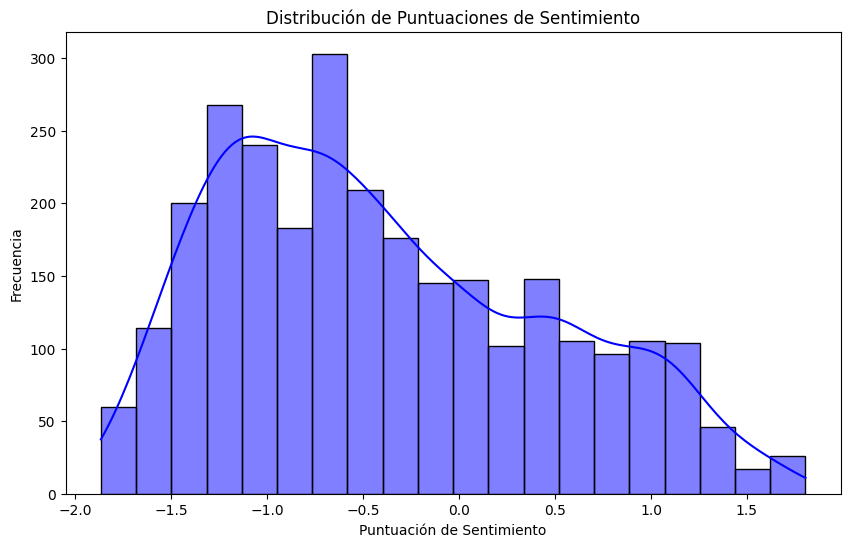

/var/folders/8b/d34q145x44x2xf_06_gchyfw0000gq/T/ipykernel_69813/291937265.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Tipo', y='Puntaje', data=df, ci=None)


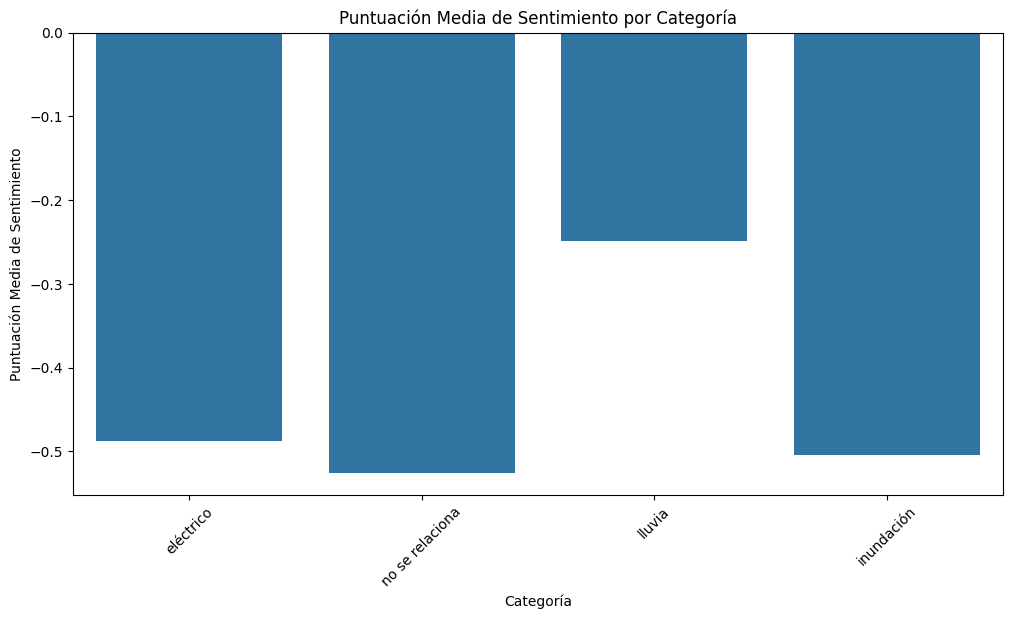

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de puntuaciones de sentimiento
plt.figure(figsize=(10, 6))
sns.histplot(df['Puntaje'], bins=20, kde=True, color='blue')
plt.title('Distribución de Puntuaciones de Sentimiento')
plt.xlabel('Puntuación de Sentimiento')
plt.ylabel('Frecuencia')
plt.show()

# Si tienes una columna con categorías o temas, por ejemplo 'Category'
# Aquí te muestro cómo hacer un gráfico de barras
if 'Tipo' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Tipo', y='Puntaje', data=df, ci=None)
    plt.title('Puntuación Media de Sentimiento por Categoría')
    plt.xlabel('Categoría')
    plt.ylabel('Puntuación Media de Sentimiento')
    plt.xticks(rotation=45)
    plt.show()

# Scatter plot para visualizar la puntuación a lo largo de otra variable (ej. tiempo)
if 'Timestamp' in df.columns:
    plt.figure(figsize=(14, 6))
    sns.scatterplot(x='Timestamp', y='Sentiment_Score', data=df, hue='Sentiment_Score', palette='coolwarm', alpha=0.7)
    plt.title('Puntuación de Sentimiento a lo Largo del Tiempo')
    plt.xlabel('Fecha y Hora')
    plt.ylabel('Puntuación de Sentimiento')
    plt.show()


In [7]:
import spacy

# Cargar el modelo de español grande
nlp = spacy.load("es_core_news_lg")

# Probar con un texto de ejemplo
doc = nlp("en sanpedro un canal de bajapresión en la sierra madre occidental y centro de provocará lluvias torrenciales en gro oax pue y ver intensas en camp tamps chis col hgo jal mich qroo slp tab y yuc muy fuertes en edomex gto mor nay nl qro y tlax") 
for ent in doc.ents:
    print(ent.text, ent.label_)

sanpedro LOC
bajapresión LOC
sierra madre occidental LOC
gro oax pue ORG
edomex ORG
gto mor nay nl qro PER
tlax ORG


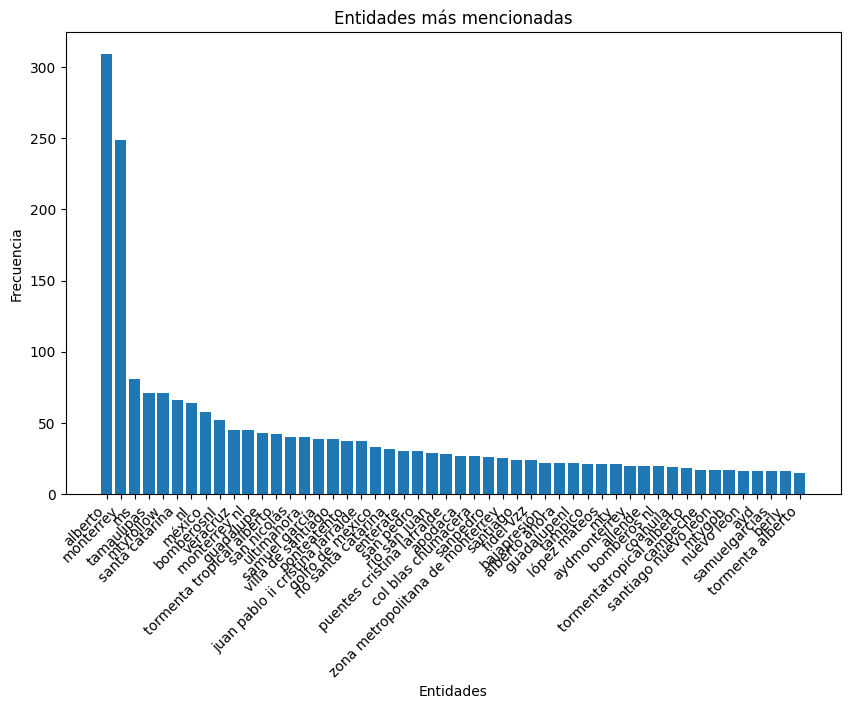

In [8]:
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Cargar el modelo de español grande
nlp = spacy.load("es_core_news_lg")

# Inicializar un Counter para contar las entidades
ent_counter = Counter()

# Procesar cada texto en la columna 'Texto'
for texto in df['Texto']:
    doc = nlp(texto)
    for ent in doc.ents:
        ent_counter[ent.text] += 1

# Crear un histograma con las entidades más mencionadas
most_common_ents = ent_counter.most_common(50)  
# Separar las entidades y sus frecuencias
entities, counts = zip(*most_common_ents)
 
# Generar el histograma
plt.figure(figsize=(10, 6))
plt.bar(entities, counts)
plt.xticks(rotation=45, ha='right')
plt.title('Entidades más mencionadas')
plt.xlabel('Entidades')
plt.ylabel('Frecuencia')
plt.show()


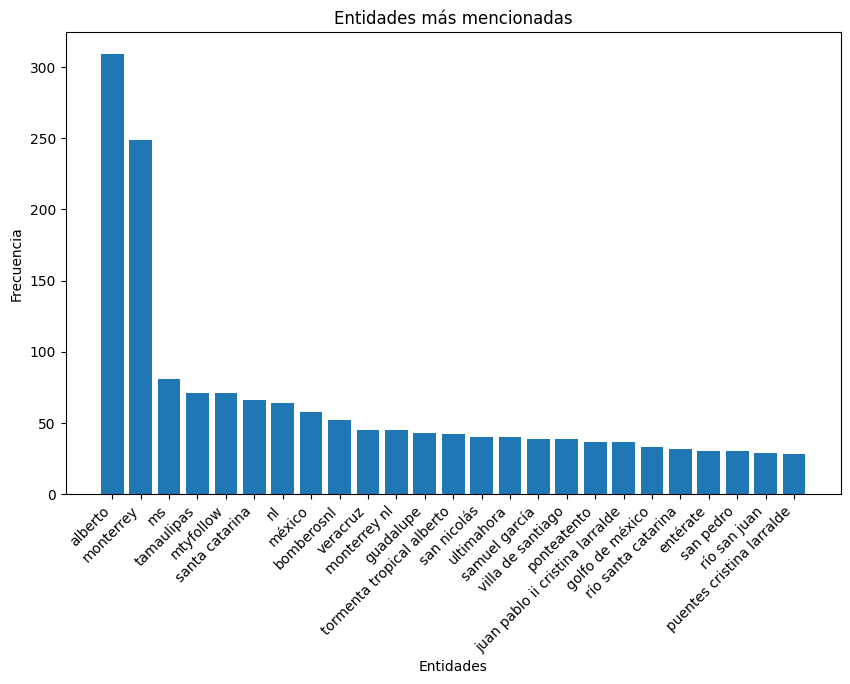

In [68]:
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Cargar el modelo de español grande
nlp = spacy.load("es_core_news_lg")

# Inicializar un Counter para contar las entidades
ent_counter = Counter()

# Crear una lista para almacenar las entidades de cada texto
entidades_list = []

# Procesar cada texto en la columna 'Texto'
for texto in df['Texto']:
    doc = nlp(texto)
    entidades = [ent.text for ent in doc.ents]
    entidades_list.append(entidades)
    # Contar las entidades para el histograma
    for ent in doc.ents:
        ent_counter[ent.text] += 1

# Añadir la columna 'entidades' al DataFrame
df['entidades'] = entidades_list

# Guardar el DataFrame con la nueva columna en un archivo CSV
df.to_csv('df_con_entidades.csv', index=False)

# Crear un histograma con las entidades más mencionadas
most_common_ents = ent_counter.most_common(25)  
# Separar las entidades y sus frecuencias
entities, counts = zip(*most_common_ents)

# Generar el histograma
plt.figure(figsize=(10, 6))
plt.bar(entities, counts)
plt.xticks(rotation=45, ha='right')
plt.title('Entidades más mencionadas')
plt.xlabel('Entidades')
plt.ylabel('Frecuencia')
plt.show()


# Análisis de sentimiento V2

In [14]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import pandas as pd

# Cargar el modelo y el tokenizer
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

# Cargar el dataset
df = pd.read_csv('df_calificado_sin_duplicados.csv')

# Asignación de valores a las etiquetas de sentimiento del modelo preentrenado
sentiment_labels = [-2, -1, 0, 1, 2]

# Diccionario de palabras con sus puntajes personalizados
word_sentiment_scores = {
    'lluvia': -0.2, 'nublado': -0.2, 'tormenta': -0.4, 'viento': -0.2, 'granizo': -0.4,  # Clima
    'accidente': -0.4, 'choque': -0.4, 'derrape': -0.4, 'atropello': -0.6,  # Accidentes vehiculares
    'tráfico': -0.2, 'atasco': -0.2, 'congestión': -0.2, 'embotellamiento': -0.4,  # Problemas de tráfico
    'inundación': -0.6, 'desborde': -0.6, 'charco': -0.2, 'encharcamiento': -0.4,  # Problemas por agua
    'apagón': -0.4, 'falla': -0.2, 'electricidad': -0.2, 'corte': -0.4, 'colapso': -0.6,  # Problemas eléctricos
    'evacuación': -0.6, 'rescate': -0.4, 'desalojo': -0.6,  # Emergencias
    'muertos': -0.8, 'heridos': -0.6, 'destrucción': -0.8, 'incendio': -0.6,  # Consecuencias graves
    'explosión': -0.8, 'caos': -0.4, 'derrumbes': -0.6, 'colapsos': -0.6,  # Otros desastres
    'afectados': -0.4, 'perdidas': -0.6, 'daños': -0.4, 'colisión': -0.4,  # Impactos generales
    'caída': -0.2, 'árboles': -0.2, 'postes': -0.2, 'barrido': -0.4  # Daños materiales
}

# Función para ajustar el sentimiento según las palabras clave y ajustar su impacto
def adjust_sentiment(text, base_sentiment):
    adjustments = [score for word, score in word_sentiment_scores.items() if word in text.lower()]
    if adjustments:
        # Ajuste dinámico basado en la cantidad de palabras detectadas
        adjustment_factor = sum(adjustments) / len(adjustments)  # Promedio de los ajustes
        base_sentiment += adjustment_factor * (1 - abs(base_sentiment) / 2)  # Ajuste ponderado
    return base_sentiment

# Función para calcular la puntuación de sentimiento
def calculate_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)
    scores = outputs.logits.detach().numpy()
    scores = softmax(scores[0])
    sentiment_score = sum([a * b for a, b in zip(sentiment_labels, scores)])
    
    # Ajustar la puntuación según las palabras clave
    sentiment_score = adjust_sentiment(text, sentiment_score)
    return sentiment_score

# Aplicar la función a cada texto en la columna 'Texto'
df['Puntaje'] = df['Texto'].apply(calculate_sentiment)

# Mostrar las primeras filas con las nuevas puntuaciones de sentimiento
print(df.head())

# Guardar el dataframe con las nuevas puntuaciones
df.to_csv('df_sentimientos_ajustados.csv', index=False)


/Users/Daniel/Library/Python/3.9/lib/python/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


   Usuario Nombre                       Fecha  \
0  @Cicmty    CIC  Jun 21, 2024 · 9:38 PM UTC   
1  @Cicmty    CIC  Jun 21, 2024 · 9:32 PM UTC   
2  @Cicmty    CIC  Jun 21, 2024 · 9:30 PM UTC   
3  @Cicmty    CIC  Jun 21, 2024 · 8:58 PM UTC   
4  @Cicmty    CIC  Jun 21, 2024 · 8:11 PM UTC   

                                               Texto  Likes  Retweets  \
0  cuidadodelagua sin suministro de agua en la co...      3         0   
1  cuidadodelagua servicio de agua con aspecto tu...     10         0   
2  cuidadodelagua fuga de agua limpia en un domic...      1         0   
3  cuidadodelagua sin suministro de agua en la co...      3         0   
4  cuidadodelagua sin suministro de agua en la co...      1         0   

   Comentarios  Citas                                             Enlace  \
0            1      0  https://twitter.com/Cicmty/status/180426761407...   
1            4      0  https://twitter.com/Cicmty/status/180426623066...   
2            0      0  https://twitter

In [11]:
# Guardar el dataset modificado en un nuevo archivo CSV
output_path = 'Tweets_calificado_modelo2.csv'  # Reemplaza con la ruta correcta
df.to_csv(output_path, index=False)

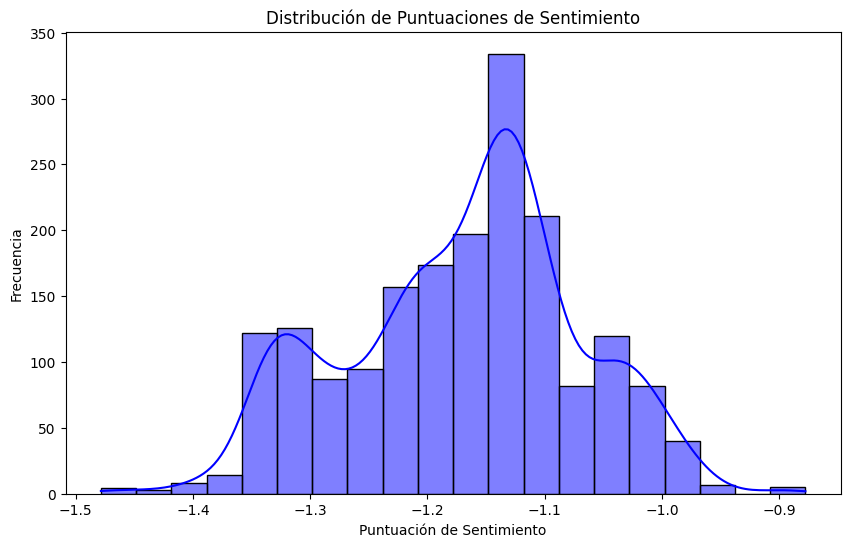

/var/folders/8b/d34q145x44x2xf_06_gchyfw0000gq/T/ipykernel_19545/291937265.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Tipo', y='Puntaje', data=df, ci=None)


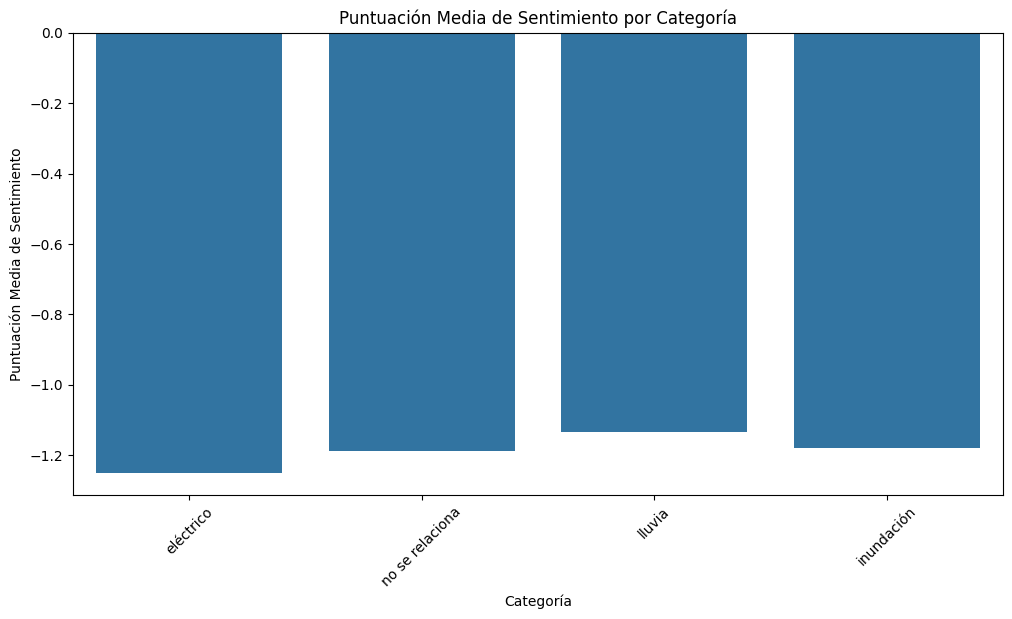

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de puntuaciones de sentimiento
plt.figure(figsize=(10, 6))
sns.histplot(df['Puntaje'], bins=20, kde=True, color='blue')
plt.title('Distribución de Puntuaciones de Sentimiento')
plt.xlabel('Puntuación de Sentimiento')
plt.ylabel('Frecuencia')
plt.show()

# Si tienes una columna con categorías o temas, por ejemplo 'Category'
# Aquí te muestro cómo hacer un gráfico de barras
if 'Tipo' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Tipo', y='Puntaje', data=df, ci=None)
    plt.title('Puntuación Media de Sentimiento por Categoría')
    plt.xlabel('Categoría')
    plt.ylabel('Puntuación Media de Sentimiento')
    plt.xticks(rotation=45)
    plt.show()

# Scatter plot para visualizar la puntuación a lo largo de otra variable (ej. tiempo)
if 'Timestamp' in df.columns:
    plt.figure(figsize=(14, 6))
    sns.scatterplot(x='Timestamp', y='Sentiment_Score', data=df, hue='Sentiment_Score', palette='coolwarm', alpha=0.7)
    plt.title('Puntuación de Sentimiento a lo Largo del Tiempo')
    plt.xlabel('Fecha y Hora')
    plt.ylabel('Puntuación de Sentimiento')
    plt.show()


## Dudas:

Análisis de sentimiento: ¿la forma en la que manejamos el puntaje se le hace adecuada? Una limitante es que el sentimiento se calcula palabra por palabra, por lo que si una palabra es positiva y otra negativa, el sentimiento final puede ser neutro.

La clasificación se le hace adecuada? La categoría no se relaciona tiene Tweets muy negativos y muchos son relacionados con accidentes de tránsito (pero no se especifica si se ocacionó por la lluvia).

Para la geolocalización tenemos que extraer la ubicación del mismo tweet, ya que no se especifica en el dataset. No todos los tweets incluyen la ubicación.
Las ubicaciones varían entre: calles, avenidas, colonias, municipios y estados. 
¿Lo manejamos en capas? 
¿Qué podemos utilizar para la geolocalización? 
¿Un mapa con puntos en las ubicaciones es el adecuado?

Dos infraestructuras: eléctrica y de transporte

Curiel NLP AUTOR
Becarios - pedir apoyo en el etiquetado, 

GEOPANDAS Y OSMNX
sacar el centroide del poligono
Areas geografícas básicas --> Mastra, Andrés, JP
